In [1]:
# Preliminary
## Columnar analysis basics.
import uproot
import awkward as ak
## Plotting.
import matplotlib.pyplot as plt

# Hists
import hist
from hist import Hist

# NanoEvents
from coffea.nanoevents import NanoEventsFactory, BaseSchema
# Processors
import coffea.processor as processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

import numpy as np

In [2]:
fname   = "/eos/home-b/bchitrod/HHH/NANOAOD/TRSM_XToHY_6b_M3_2000_M2_1100_NANOAOD.root"

In [3]:
eventsToRead = 10000
events = NanoEventsFactory.from_root(fname,schemaclass=NanoAODSchema,metadata={"dataset": "testSignal"},entry_stop=eventsToRead).events()
events

<NanoEventsArray [<event 1:1:9901>, ... <event 1:1:2500>] type='10000 * event'>

In [4]:
events.GenPart.fields

['eta',
 'mass',
 'phi',
 'pt',
 'genPartIdxMother',
 'pdgId',
 'status',
 'statusFlags',
 'genPartIdxMotherG',
 'distinctParentIdxG',
 'childrenIdxG',
 'distinctChildrenIdxG']

In [5]:

genparticles = events.GenPart[events.GenPart.pdgId==25]

#To sort by phi
#indices = ak.argsort(genparticles.phi,axis=-1)
#To sort by descending order pt
indices = ak.argsort(-genparticles.pt,axis=-1)
genparticles = genparticles[indices]


In [6]:
trijet_mass = (genparticles[:,0]+genparticles[:,1]+genparticles[:,2]).mass
print(trijet_mass)

dijet1_mass = (genparticles[:,0]+genparticles[:,1]).mass
dijet2_mass = (genparticles[:,0]+genparticles[:,2]).mass
dijet3_mass = (genparticles[:,1]+genparticles[:,2]).mass

print(dijet1_mass)
print(dijet2_mass)
print(dijet3_mass)

[2e+03, 2e+03, 2e+03, 2e+03, 2e+03, 2e+03, ... 2e+03, 2e+03, 2e+03, 2e+03, 2e+03]
[1.3e+03, 1.56e+03, 1.21e+03, 1.28e+03, ... 1.23e+03, 1.5e+03, 1.22e+03, 730]
[1.07e+03, 1.1e+03, 1.1e+03, 1.1e+03, ... 1.15e+03, 1.1e+03, 1.16e+03, 1.1e+03]
[1.1e+03, 641, 1.17e+03, 1.1e+03, 932, ... 1.1e+03, 1.1e+03, 767, 1.1e+03, 1.52e+03]


In [7]:
d1_bin = hist.axis.Regular(label="Dijet Mass H1H2 [GeV]", name="dijet1", bins=40, start=0, stop=4000)
d2_bin = hist.axis.Regular(label="Dijet Mass H2H3 [GeV]", name="dijet2", bins=40, start=0, stop=4000)
d1_cat  = hist.axis.StrCategory(label='Dijets', name='dalitz', categories=["P1"])

In [8]:
d1_hist = Hist(d1_bin, d2_bin)

In [9]:
d1_hist.fill(dijet1=dijet1_mass, dijet2=dijet2_mass)

Hist(
  Regular(40, 0, 4000, name='dijet1', label='Dijet Mass H1H2 [GeV]'),
  Regular(40, 0, 4000, name='dijet2', label='Dijet Mass H2H3 [GeV]'),
  storage=Double()) # Sum: 10000.0

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f1d979eac10>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f1d979eaf40>, text=[])

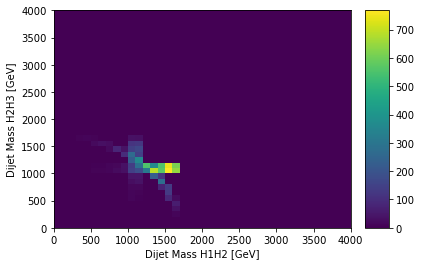

In [10]:
d1_hist.plot2d()